In [31]:
import os

import numpy as np
from numpy import pi,sin,cos,tan,e,arctan,arcsin,arccos,sqrt

from scipy.interpolate import interp2d, interp1d


import matplotlib
import matplotlib.pyplot as P
from time import clock

from matplotlib.legend import Legend

matplotlib.rcParams['figure.figsize'] = (9, 6)
P.rcParams['text.usetex'] = True  # not really needed
P.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
P.rcParams["font.size"] = 26
P.rc('xtick', labelsize=23) 
P.rc('ytick', labelsize=23)
# P.rc('xtick', labelsize=20) 
# P.rc('ytick', labelsize=20)
np.set_printoptions(threshold=np.nan)

h = 0.678

In [60]:
plotdir = "/Users/amadeus/Documents/PhD/work/MagBias/plots/"


#camb power spectrum:
pknl_root = "/Users/amadeus/Documents/PhD/work/MagBias/PkNL/"
pknl_root_old = pknl_root + "old/"
pknl_root_new = pknl_root + "new/"

k_pk = []
pknl_arr = []
for roo in [pknl_root_old, pknl_root_new]:
    filelist =  np.sort(os.listdir(roo))
    filelist = np.delete(filelist, np.where(filelist == "README.rtf")[0])
    print filelist

    # print "CHECK IF THIS IS IN ORDER:"
    # print filelist
    zc_pk = np.linspace(0,4,len(filelist)) #exact same z values as in file names
#     print zc_pk

    k_pk.append(np.loadtxt(roo + filelist[0], unpack = True)[0])

    pknl_arr.append(np.array([ np.loadtxt(roo + fi, unpack = True)[1] for fi in filelist ]))

pknl_int_old = interp2d( k_pk[0], zc_pk, pknl_arr[0])
pknl_int_new = interp2d( k_pk[1], zc_pk, pknl_arr[1])

def pknl(kk, zz, NEW = True):
    if NEW:
        res = pknl_int_new(kk/h, zz)/h**3
    else:
        res = pknl_int_old(kk/h, zz)/h**3
    if len(res) == 1:
        return res[0]
    else:
        return res

for kpk in k_pk:
    print np.amin(kpk), np.amax(kpk), len(kpk)

['Pk_z0.dat' 'Pk_z0p2.dat' 'Pk_z0p4.dat' 'Pk_z0p6.dat' 'Pk_z0p8.dat'
 'Pk_z1.dat' 'Pk_z1p2.dat' 'Pk_z1p4.dat' 'Pk_z1p6.dat' 'Pk_z1p8.dat'
 'Pk_z2.dat' 'Pk_z2p2.dat' 'Pk_z2p4.dat' 'Pk_z2p6.dat' 'Pk_z2p8.dat'
 'Pk_z3.dat' 'Pk_z3p2.dat' 'Pk_z3p4.dat' 'Pk_z3p6.dat' 'Pk_z3p8.dat'
 'Pk_z4.dat']
['Pk_z0.dat' 'Pk_z0p2.dat' 'Pk_z0p4.dat' 'Pk_z0p6.dat' 'Pk_z0p8.dat'
 'Pk_z1.dat' 'Pk_z1p2.dat' 'Pk_z1p4.dat' 'Pk_z1p6.dat' 'Pk_z1p8.dat'
 'Pk_z2.dat' 'Pk_z2p2.dat' 'Pk_z2p4.dat' 'Pk_z2p6.dat' 'Pk_z2p8.dat'
 'Pk_z3.dat' 'Pk_z3p2.dat' 'Pk_z3p4.dat' 'Pk_z3p6.dat' 'Pk_z3p8.dat'
 'Pk_z4.dat']
0.0001 24.28 621
0.0001 9.999999999999984 1000


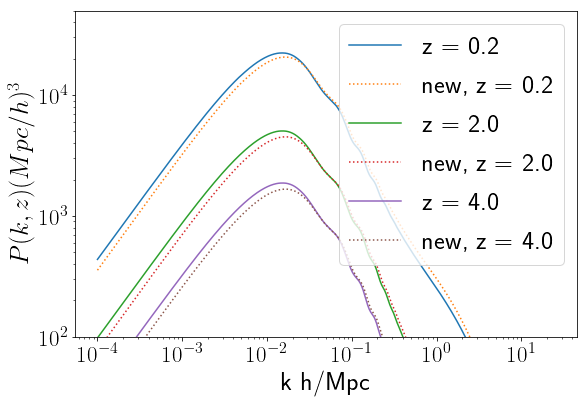

In [61]:
fig = P.figure(); ax = fig.add_subplot(111);

# for iz in range(len(zc_pk[::5])):
for iz in [1,10,-1]:
    ax.loglog(k_pk[0], pknl_arr[0][iz], label = "z = {}".format(zc_pk[iz]))
    ax.loglog(k_pk[1], pknl_arr[1][iz], ls = ":", label = "new, z = {}".format(zc_pk[iz]))
ax.set_ylim((1e2, 5e4))
ax.set_xlabel("k h/Mpc")
ax.set_ylabel(r"$P(k,z) (Mpc/h)^3$")
ax.legend()

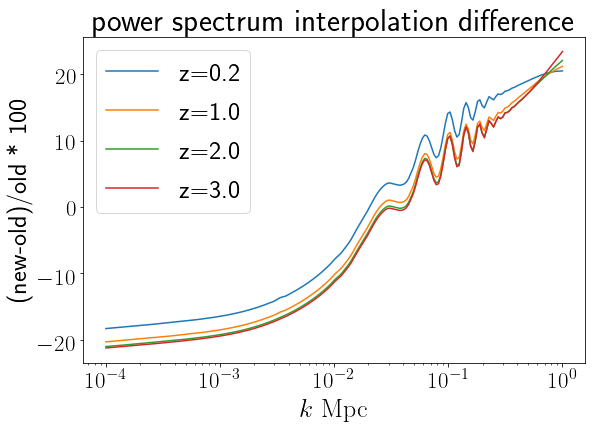

In [63]:
# ztab =  np.linspace(0,4,200);
# ktab = [2e-4, 1e-2, 1e-1, 1, 8]
ktab = np.logspace(-4,0,200)
ztab = [0.2, 1., 2., 3.,]
fig = P.figure(); ax = fig.add_subplot(111);
for z in ztab:
    tmp = []
    for newboo in [True, False]: #new or old
        tmp.append(pknl(ktab, z, NEW = newboo))
    ax.semilogx(ktab, (tmp[0]-tmp[1])/tmp[1]*100, label = "z={}".format(z))
ax.set_xlabel(r"$k \mathrm{~Mpc}$")
ax.set_ylabel("(new-old)/old * 100")
ax.legend()
ax.set_title("power spectrum interpolation difference")
P.savefig(plotdir + "powerspectrum_newVSold.png")